In [1]:
# http://www.robesafe.uah.es/personal/eduardo.romera/uah-driveset/

# http://www.robesafe.uah.es/personal/eduardo.romera/pdfs/Romera16itsc.pdf
# pdf contains description of data (what each column means)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from ride_parser import RideParser
from app_data_parser import get_data_from_app
from PIL import Image

Objetivos:
- [] Gerar mapa com a rota feita por cada um dos motoristas
- [] Sincronizar vídeo com eventos de aceleração

In [2]:
ride_root_dir = os.path.join("UAH-DRIVESET-v1", "UAH-DRIVESET-v1", "D1", "20151110175712-16km-D1-NORMAL1-SECONDARY")

ride = RideParser(ride_root_dir)

# col_names = [str(i) for i in range(13)]
# col_names = ["timestamp", "speed", "lat", "long", "altitude", "vert accuracy", "horiz accuracy", "course", "difcourse", "?1", "?2", "?3", "?4"]
# pd.read_csv(gps_file_path, sep=" ", names=col_names)

ride.gps_df
ride.accelerometer_df

,timestamp,is speed gt 50 kmh,acc_x,acc_y,acc_z,filtered_acc_x,filtered_acc_y,filtered_acc_z,roll_degrees,pitch_degrees,yaw_degrees,?1,?2,?3,?4
0,6.94,1,0.017,-0.011,0.018,-0.005,0.008,0.018,-1.523,0.015,0.012,NaN,NaN,NaN,NaN
1,7.03,1,0.046,0.007,0.019,0.016,-0.002,0.018,-1.522,0.012,0.012,NaN,NaN,NaN,NaN
2,7.14,1,0.052,-0.016,0.027,0.037,-0.005,0.018,-1.520,0.014,0.011,NaN,NaN,NaN,NaN
3,7.24,1,0.015,-0.016,0.026,0.038,-0.009,0.024,-1.523,0.014,0.011,NaN,NaN,NaN,NaN
4,7.34,1,-0.014,-0.017,0.040,0.012,-0.016,0.032,-1.525,0.012,0.011,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,630.54,1,-0.051,0.096,0.023,-0.046,0.073,0.003,-1.534,-0.013,-1.265,NaN,NaN,NaN,NaN
6166,630.64,1,0.036,0.085,0.006,-0.018,0.069,0.015,-1.534,-0.012,-1.271,NaN,NaN,NaN,NaN
6167,630.75,1,0.045,0.028,-0.011,0.024,0.058,0.001,-1.532,-0.011,-1.272,NaN,NaN,NaN,NaN
6168,630.84,1,-0.031,0.063,-0.011,0.010,0.053,-0.011,-1.531,-0.009,-1.278,NaN,NaN,NaN,NaN


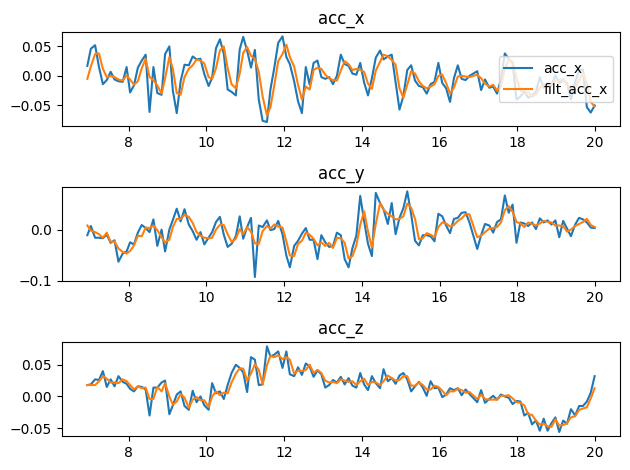

In [3]:
fig, axs = plt.subplots(ncols=1, nrows=3)

accelerometer_df = ride.accelerometer_df
accelerometer_df = accelerometer_df[accelerometer_df.timestamp < 20]
acc_x = accelerometer_df["acc_x"]
acc_y = accelerometer_df["acc_y"]
acc_z = accelerometer_df["acc_z"]
timestamp = accelerometer_df["timestamp"]

# axs[0].scatter(timestamp, acc_x, s=0.1)
axs[0].plot(timestamp, accelerometer_df["acc_x"], label="acc_x")
axs[0].plot(timestamp, accelerometer_df["filtered_acc_x"], label="filt_acc_x")
axs[0].legend(loc='right')
axs[0].set_title("acc_x")

axs[1].plot(timestamp, acc_y)
axs[1].plot(timestamp, accelerometer_df["filtered_acc_y"])
axs[1].set_title("acc_y")

axs[2].plot(timestamp, acc_z)
axs[2].plot(timestamp, accelerometer_df["filtered_acc_z"])
axs[2].set_title("acc_z")

# axs.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

fig.tight_layout()

plt.show()

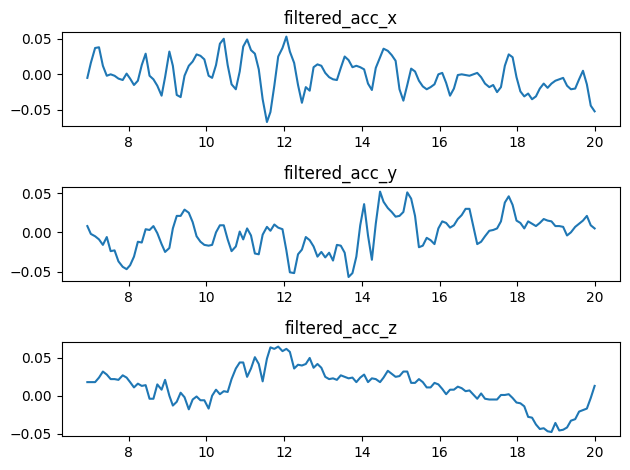

In [4]:
fig, axs = plt.subplots(ncols=1, nrows=3)

accelerometer_df = ride.accelerometer_df
accelerometer_df = accelerometer_df[accelerometer_df.timestamp < 20]
filtered_acc_x = accelerometer_df["filtered_acc_x"]
filtered_acc_y = accelerometer_df["filtered_acc_y"]
filtered_acc_z = accelerometer_df["filtered_acc_z"]
timestamp = accelerometer_df["timestamp"]

# axs[0].scatter(timestamp, filtered_acc_x, s=0.1)
axs[0].plot(timestamp, filtered_acc_x) #, "-o")
axs[0].set_title("filtered_acc_x")

axs[1].plot(timestamp, filtered_acc_y)
axs[1].set_title("filtered_acc_y")

axs[2].plot(timestamp, filtered_acc_z)
axs[2].set_title("filtered_acc_z")

fig.tight_layout()

plt.show()

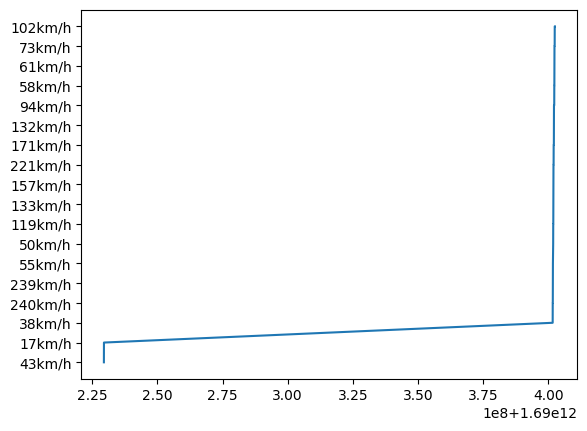

In [5]:
app_data = get_data_from_app()

velocities = app_data["SPEED"]
plt.plot(velocities["timestamp"], velocities["SPEED"])
plt.show()

In [6]:
# imgs = ride.generate_acc_sub_graph()

# im = Image.open(next(imgs))
# im.show(title="My Image")

In [7]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.animation as animation

# import numpy
# from PIL import Image

# n = 20

# img = [] # some array of images
# for i in range(n):
# 	imarray = numpy.random.rand(100,100,3) * 255
# 	im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
# 	img.append(im)

# frames = [] # for storing the generated images
# fig = plt.figure()
# for i in range(n):
# 	frames.append([plt.imshow(img[i], cmap=cm.Greys_r,animated=True)])

# ani = animation.ArtistAnimation(fig, frames, blit=True)

# writergif = animation.PillowWriter(fps=1)
# ani.save('movie.gif', writer=writergif)
# plt.show()

In [8]:
# import io
# from PIL import Image
# import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

# plt.figure()
# plt.plot([1, 2])

# img_buf = io.BytesIO()
# plt.savefig(img_buf, format='png')

# im = Image.open(img_buf)
# im.show(title="My Image")

# img_buf.close()